In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the Dataset

In [320]:
# # to avoid encodeing error use encodeing="unicode_escape"
# df = pd.read_csv("Diwali_Sales_Data.csv", encoding="unicode_escape")
# df.head()

In [321]:
df = pd.read_csv("Diwali_Sales_Data.csv")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra�Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [322]:
df.shape

(11251, 15)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


This dataset contains 14 columns and 11,251 records. However, the 'Status' and 'Unnamed1' columns have no values. Additionally, the 'Amount' column contains some Null values.

# Data Cleaning

#### Drop columns that have no values

In [324]:
df.drop(["Status", "unnamed1"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


#### Check if there are any records with Null values

In [325]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

#### Drop records that contain Null values

In [326]:
df.dropna(inplace=True)

In [327]:
df.shape

(11239, 13)

In [328]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

#### Convert the 'Amount' column from decimal to whole numbers

In [329]:
df["Amount"] = df["Amount"].astype('int')

In [330]:
df["Amount"].dtype

dtype('int64')

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


# Perform Exploratory Data Analysis 

In [332]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#### Analyze numeric columns

In [333]:
# df.describe() # to analyse all numaric column

In [334]:
df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


#### Check which gender category has the most customers

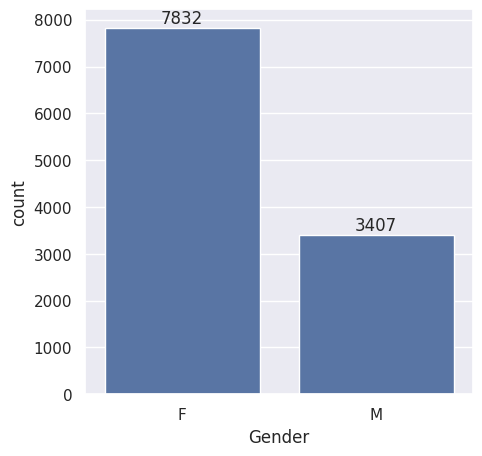

In [335]:
sns.set(rc={"figure.figsize":(5,5)})
g = sns.countplot(data=df, x="Gender")

for bars in g.containers: # add numerical labels to the bars
    g.bar_label(bars)
plt.show()

#### Check which gender category spends the most

In [336]:
gender_group = df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
# as_index=False ensures the result is returned as a DataFrame instead of setting "Gender" as the index.

gender_group

,Gender,Amount
0,F,74335853
1,M,31913276


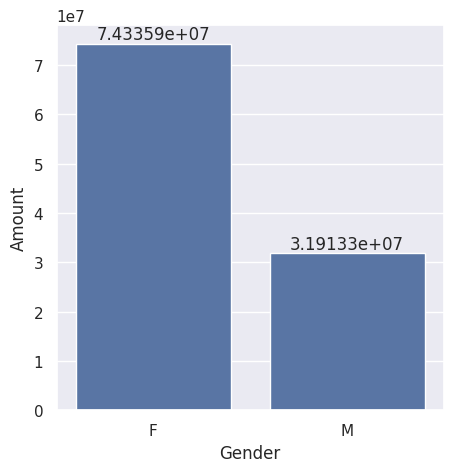

In [337]:
ax = sns.barplot(data = gender_group, x="Gender", y="Amount")

for bars in ax.containers: # add numerical labels to the bars
    ax.bar_label(bars)
plt.show()

#### Check which age group purchases the most

<Axes: xlabel='Age Group', ylabel='count'>

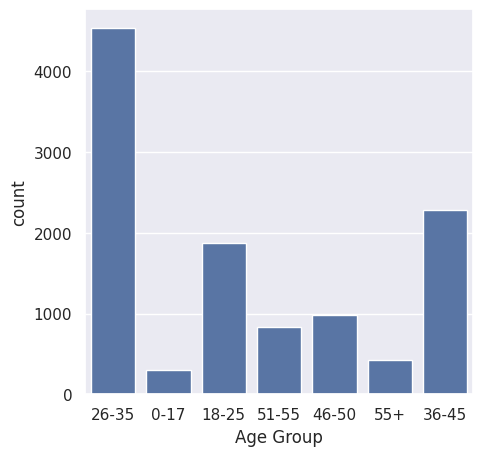

In [338]:
sns.countplot(data=df, x="Age Group")

#### Based on age groups, check which gender category purchases more

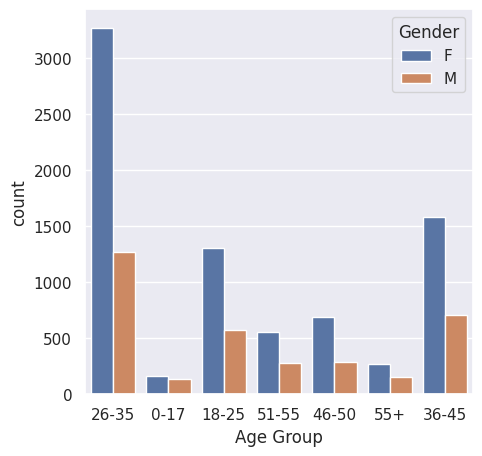

In [339]:
sns.countplot(data=df, x="Age Group", hue="Gender")
plt.show()

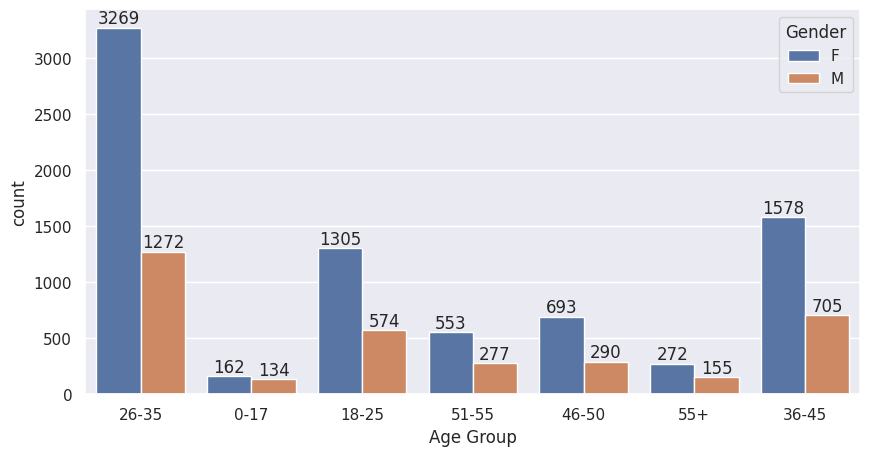

In [340]:
sns.set(rc={"figure.figsize":(10,5)})
ag = sns.countplot(data=df, x="Age Group", hue="Gender")

for bars in ag.containers:
    ag.bar_label(bars)
plt.show()

#### Check which age group spends the most

In [341]:
age_gen_group = df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
age_gen_group

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


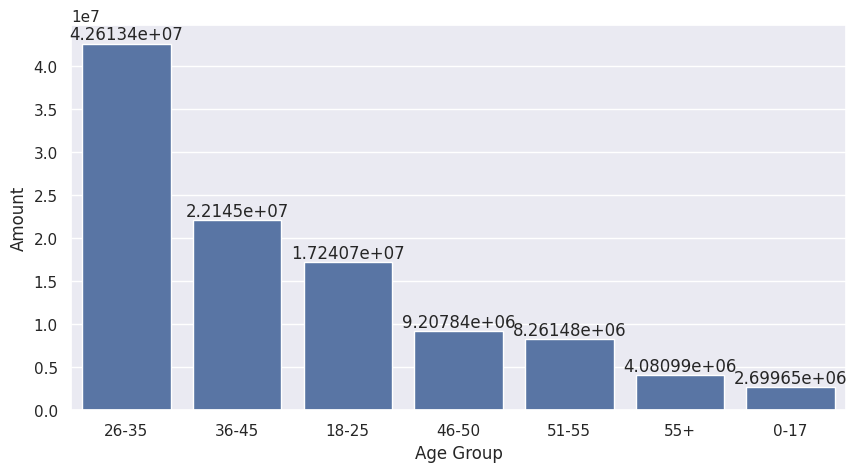

In [342]:
ax = sns.barplot(data=age_gen_group, x="Age Group", y="Amount")

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

#### Check which state has the most customers

In [343]:
state_orders = df.groupby("State", as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
state_orders

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra�Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


Check the top 10 states only

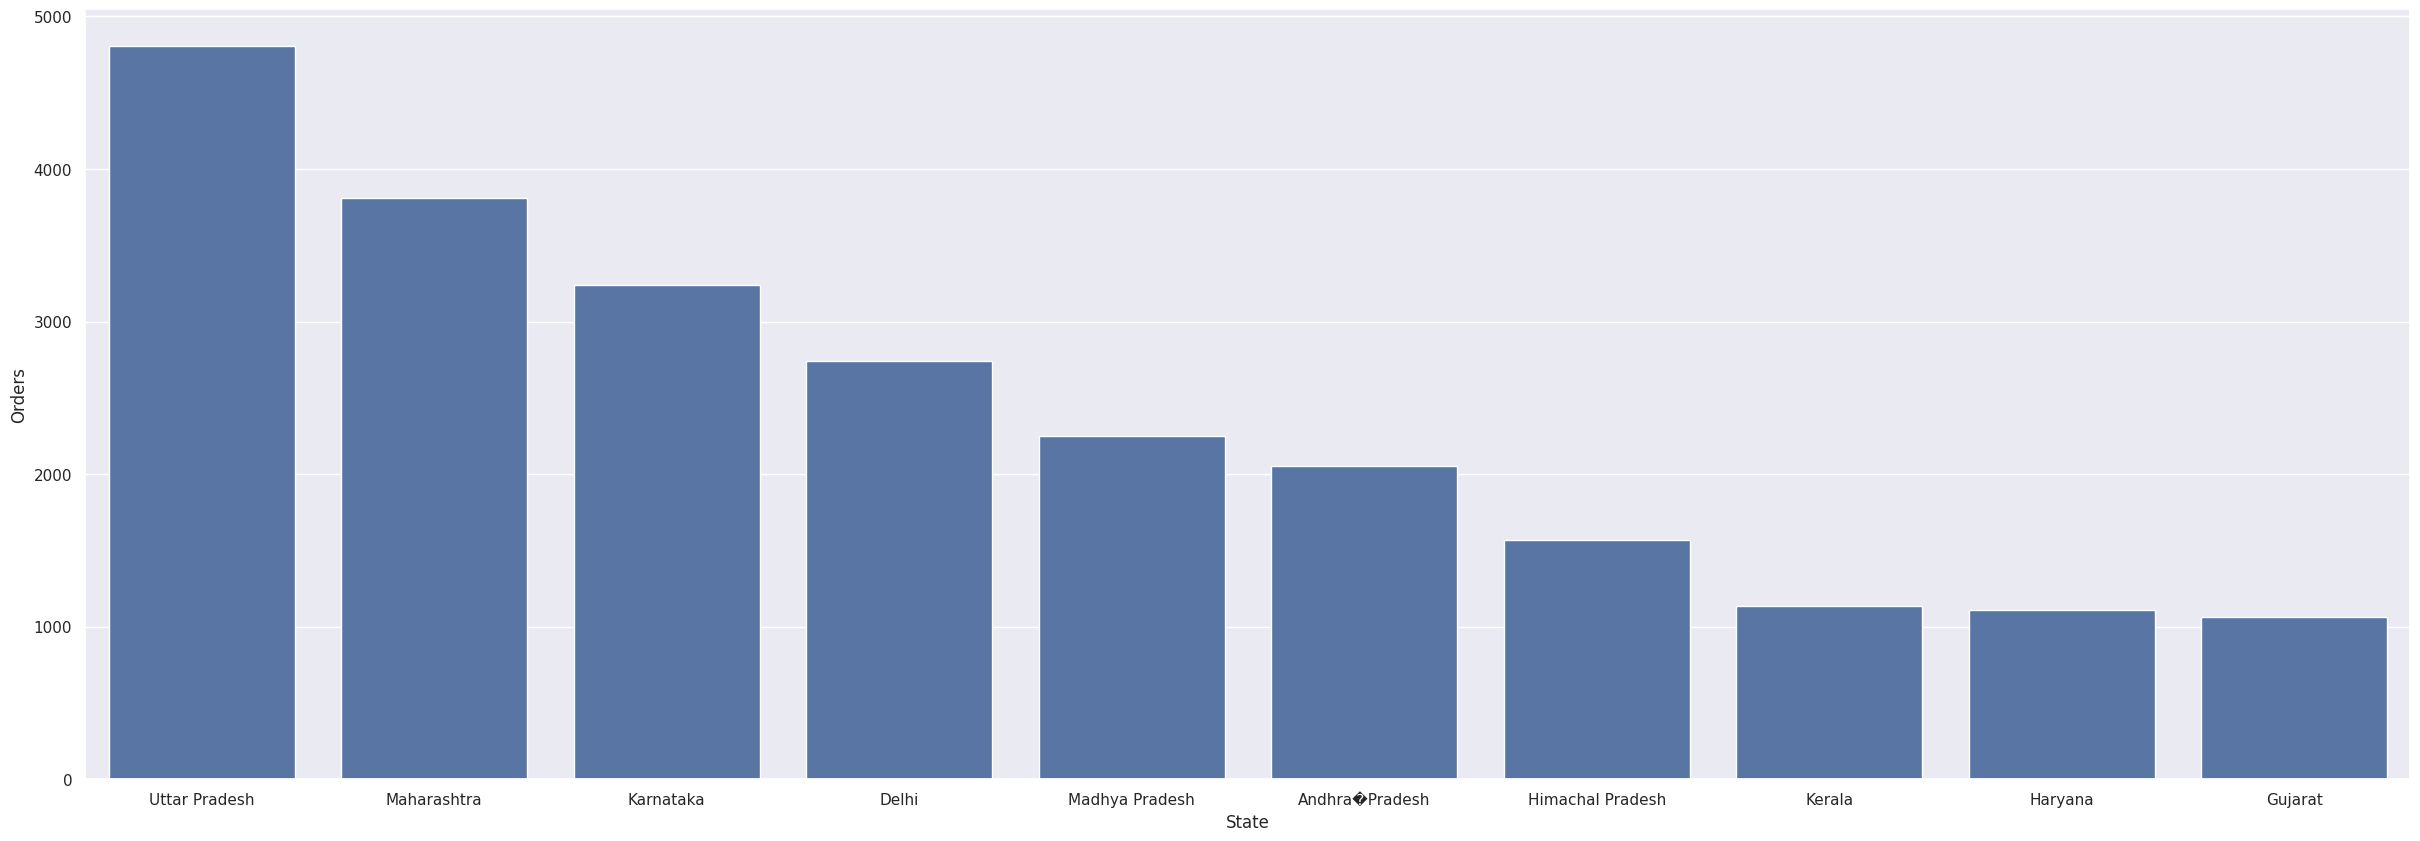

In [344]:
sns.set(rc={"figure.figsize":(30,10)})

# state_orders = df.groupby("State", as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
state_orders = df.groupby("State", as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

sns.barplot(data=state_orders, x="State", y="Orders")
sns.set(rc={"figure.figsize":(30,5)})
plt.show()

#### Check which state contributes the most revenue

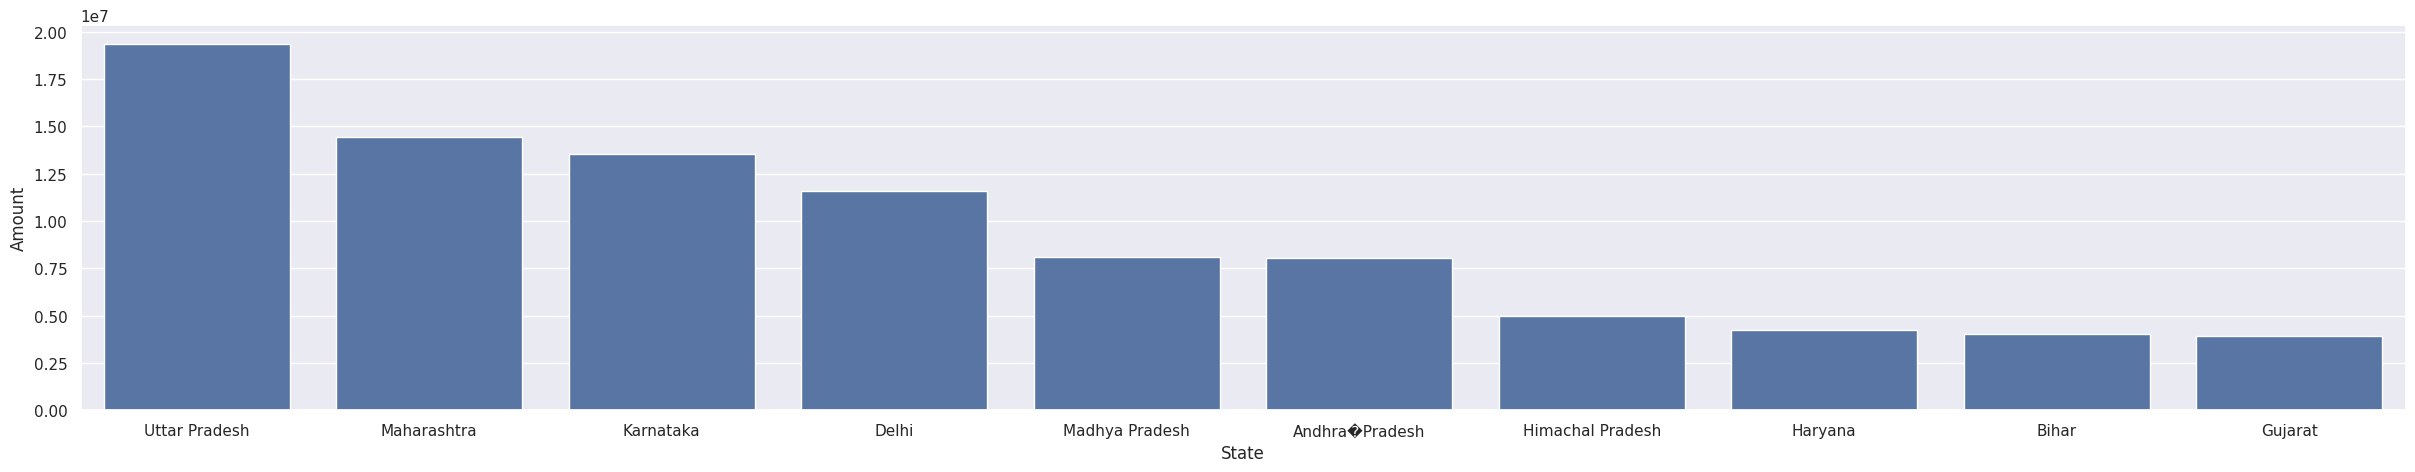

In [345]:
state_amount = df.groupby("State", as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

sns.barplot(data=state_amount, x="State", y="Amount")
sns.set(rc={"figure.figsize":(15,5)})
plt.show()

#### Check our customers marital status

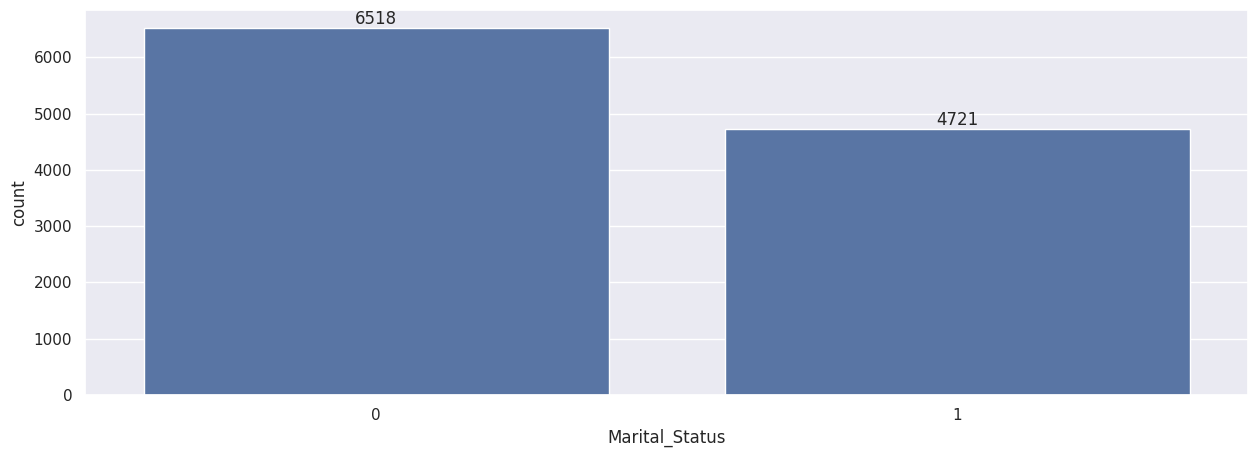

In [346]:
ms = sns.countplot(data=df, x="Marital_Status")

for bars in ms.containers:
    ms.bar_label(bars)
sns.set(rc={"figure.figsize":(10,5)})
plt.show()

#### check number of gender category spending based of marital status

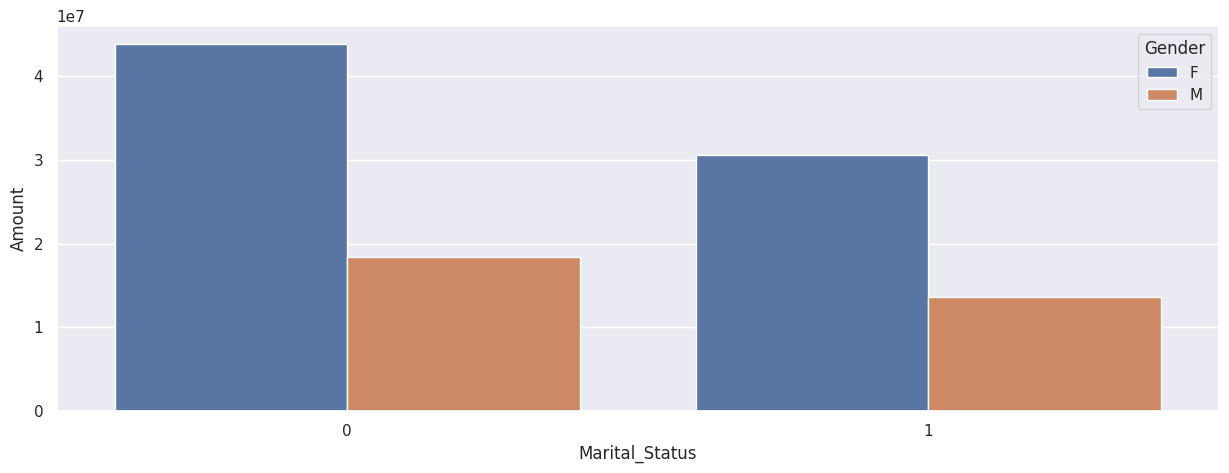

In [347]:
sns.set(rc={"figure.figsize":(15,5)})

state_amount = df.groupby(["Marital_Status","Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(5)

ax = sns.barplot(data=state_amount, x="Marital_Status", y="Amount", hue="Gender")

plt.show()

#### check under which occupation our most of the customer work

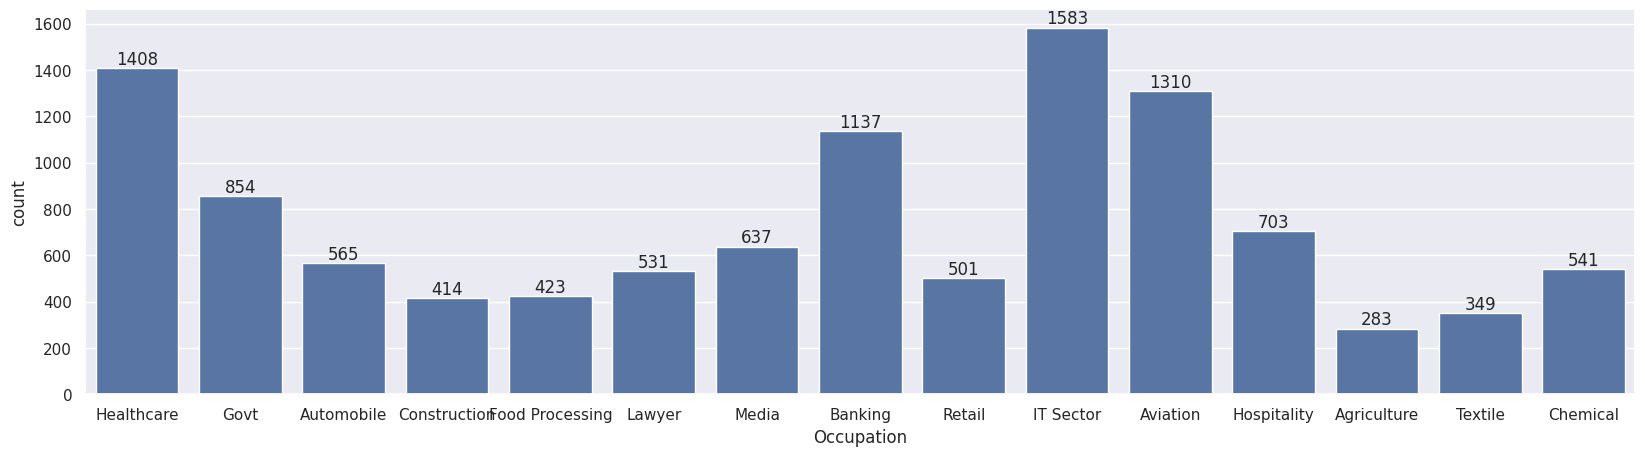

In [348]:
sns.set(rc={"figure.figsize":(20,5)})
oc = sns.countplot(data=df, x="Occupation")

for bars in oc.containers:
    oc.bar_label(bars)

plt.show()

#### check in which occupation they have who spend more

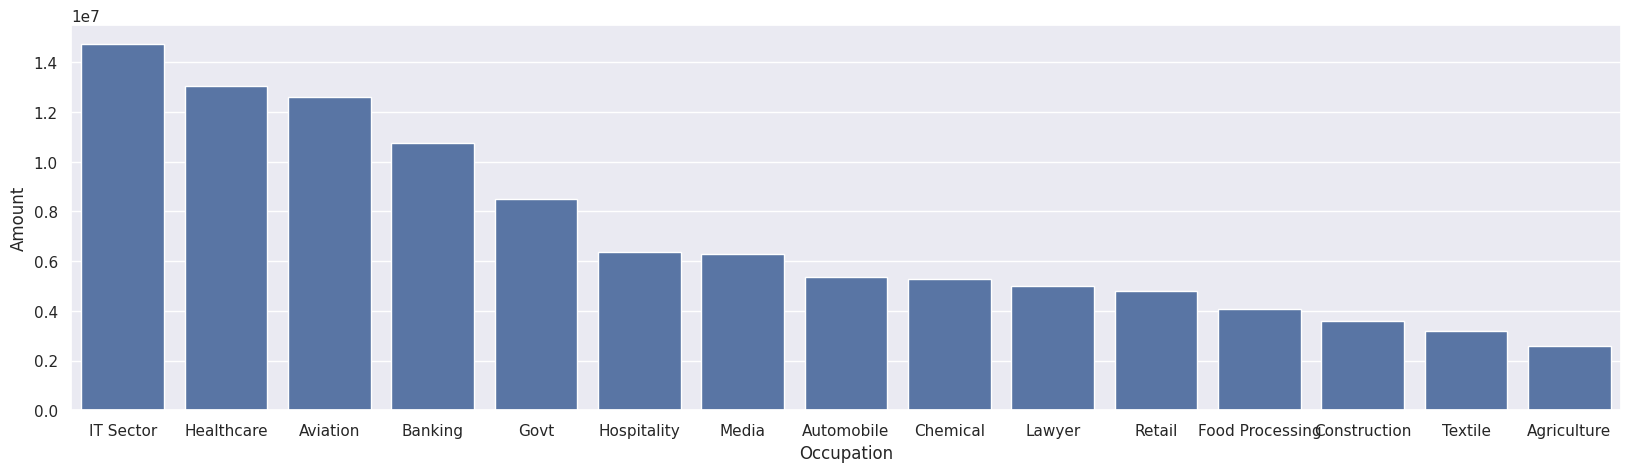

In [349]:
state_amount = df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sns.barplot(data=state_amount, x="Occupation", y="Amount")
sns.set(rc={"figure.figsize":(20,5)})
plt.show()

#### check which product category have sold more

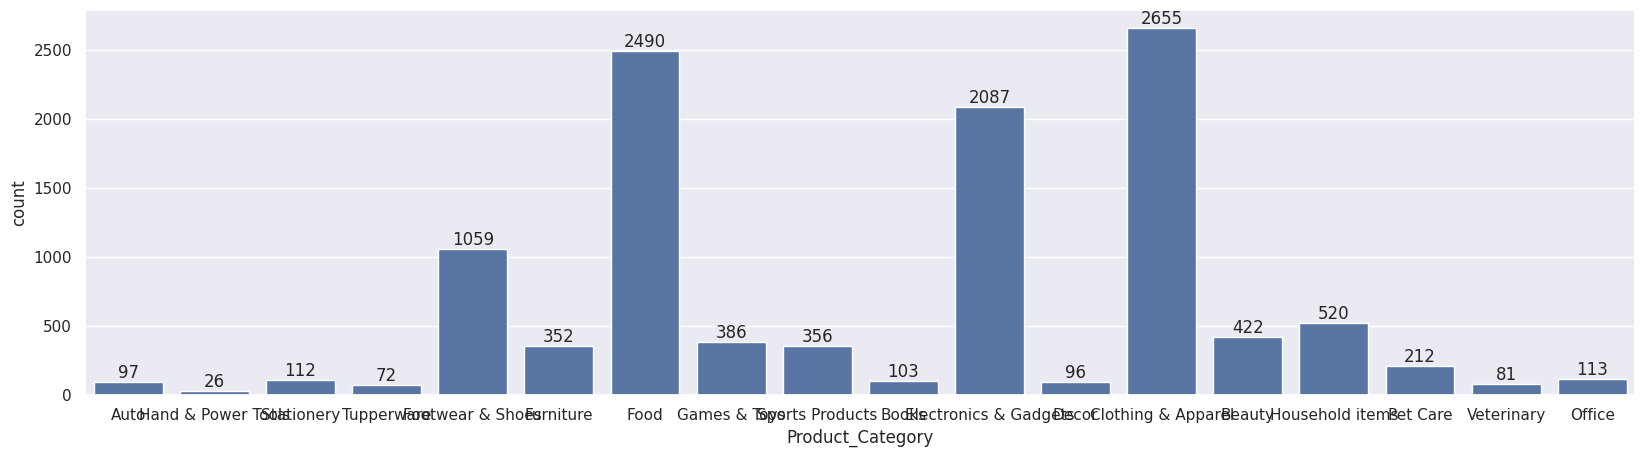

In [350]:
pc = sns.countplot(data=df, x="Product_Category")
sns.set(rc={"figure.figsize":(30,5)})

for bars in pc.containers:
    pc.bar_label(bars)
plt.show()

#### check which product category have high demand

In [351]:
pc_group = df.groupby(["Product_Category"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

pc_group

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6110
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2646
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,889
14,Sports Products,870
13,Pet Care,536


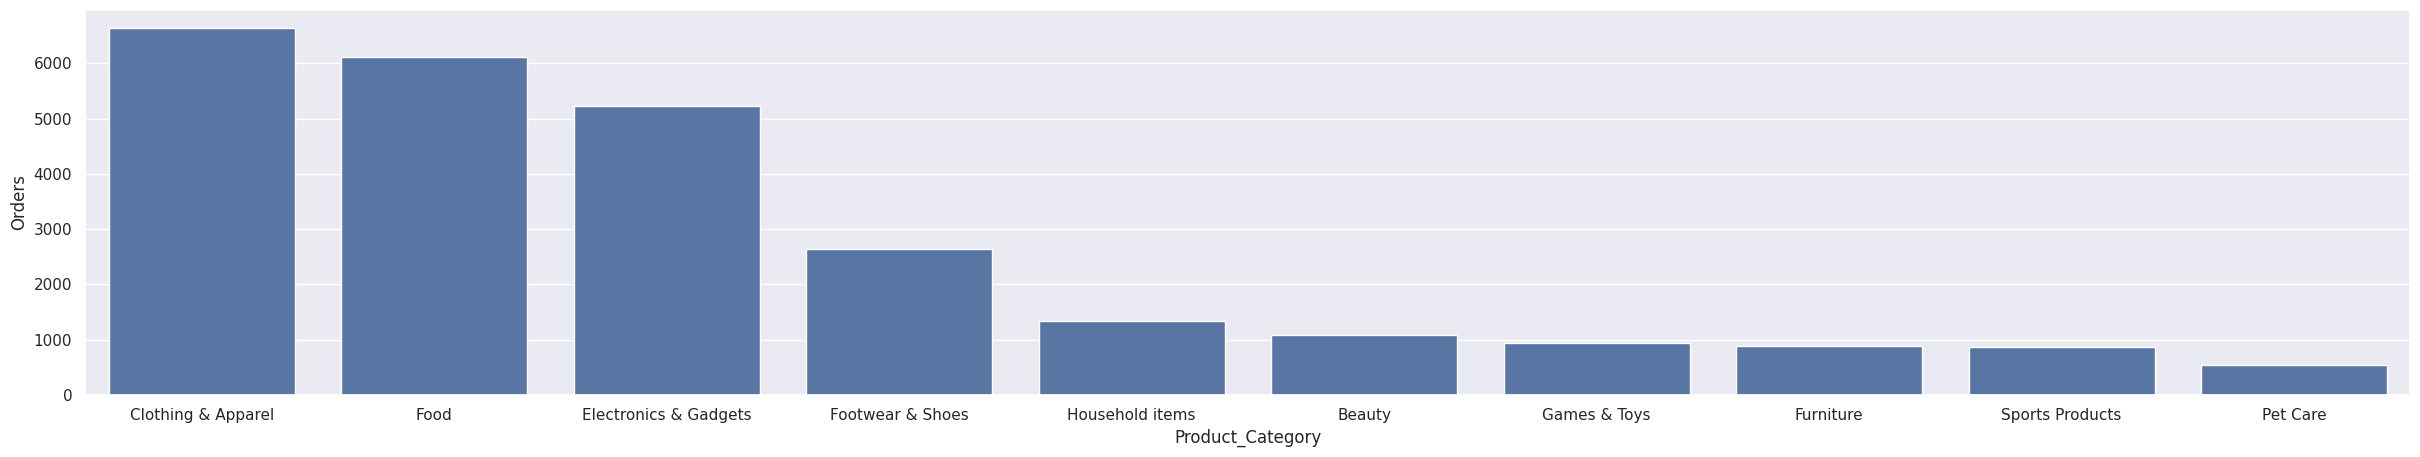

In [352]:
sns.barplot(data=pc_group, x="Product_Category", y="Orders")
sns.set(rc={"figure.figsize":(20,10)})
plt.show()

#### check which customer orders more

In [353]:
pi_group = df.groupby(["Product_ID"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

pi_group

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
171,P00025442,79
679,P00114942,79
888,P00145042,76
708,P00117942,76
298,P00044442,75
643,P00110842,74


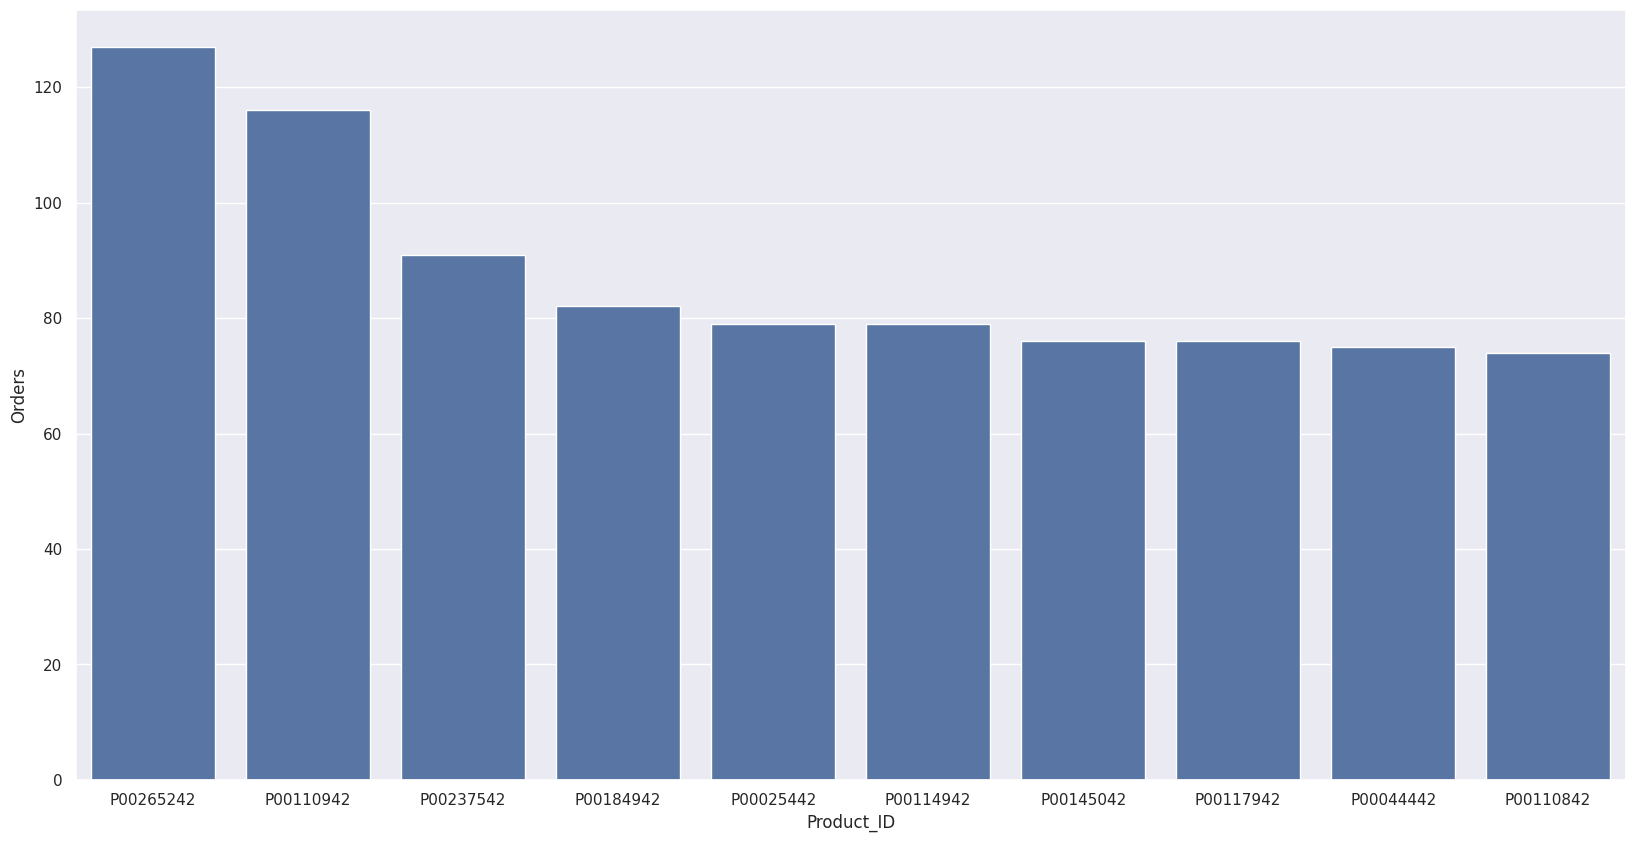

In [354]:
sns.barplot(data=pi_group, x="Product_ID", y="Orders")
sns.set(rc={"figure.figsize":(20,10)})
plt.show()

# Final Conclusion

#### This dataset consists of 14 columns and 11,251 records. However, the 'Status' and 'Unnamed1' columns contain no values, and the 'Amount' column has some missing values. After performing data cleaning, unnecessary columns are removed, and missing values are handled appropriately. Exploratory Data Analysis (EDA) reveals key insights into customer demographics, spending behavior, and revenue contributions from different states. These findings provide valuable insights for better decision-making in business strategy and customer engagement.